In [1]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random

In [2]:
s = str.maketrans('', '', punctuation)
a = 'salam!@'
a.translate(s)

'salam'

In [3]:
stop_words = stopwords.words('english')

In [4]:
negative_documents = []
max_len_negative = 0
for file in os.listdir('data/neg'):
    with open('data/neg/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text) # Tokenize the text
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_negative:
            max_len_negative = len(tokens)
        negative_documents.append(' '.join(tokens))
len(negative_documents)

1000

In [5]:
max_len_negative

1400

In [6]:
positive_documents = []
max_len_positive = 0
for file in os.listdir('data/pos'):
    with open('data/pos/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_positive:
            max_len_positive = len(tokens)
        positive_documents.append(' '.join(tokens))
len(positive_documents)

1000

In [7]:
max_len_positive

1693

In [8]:
max_len = max(max_len_negative, max_len_positive)

In [9]:
random.shuffle(negative_documents)
random.shuffle(positive_documents)

In [10]:
import random

X_train = negative_documents[:800] + positive_documents[:800]
y_train = [0]*800 + [1]*800
train = list(zip(X_train, y_train))
random.shuffle(train)
X_train, y_train = zip(*train)

X_test = negative_documents[800:] + positive_documents[800:]
y_test = [0]*200 + [1]*200
test = list(zip(X_test, y_test))
random.shuffle(test)
X_test, y_test = zip(*test)


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding, Conv1D, MaxPool1D, Dropout, concatenate

In [12]:
max_len

1693

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [42]:
import pickle
with open('tokenizer.keras', 'wb') as f:
    pickle.dump(tokenizer, f)

In [43]:
tokenizer

In [14]:
tokenizer.word_index

{'film': 1,
 'nt': 2,
 'movie': 3,
 'one': 4,
 'like': 5,
 'even': 6,
 'good': 7,
 'would': 8,
 'time': 9,
 'story': 10,
 'much': 11,
 'character': 12,
 'also': 13,
 'get': 14,
 'characters': 15,
 'two': 16,
 'see': 17,
 'first': 18,
 'way': 19,
 'well': 20,
 'really': 21,
 'films': 22,
 'make': 23,
 'could': 24,
 'plot': 25,
 'life': 26,
 'little': 27,
 'people': 28,
 'scene': 29,
 'bad': 30,
 'never': 31,
 'man': 32,
 'best': 33,
 'many': 34,
 'new': 35,
 'scenes': 36,
 'movies': 37,
 'know': 38,
 'director': 39,
 'another': 40,
 'great': 41,
 'love': 42,
 'action': 43,
 'us': 44,
 'go': 45,
 'back': 46,
 'something': 47,
 'world': 48,
 'end': 49,
 'still': 50,
 'made': 51,
 'seems': 52,
 'makes': 53,
 'however': 54,
 'work': 55,
 'big': 56,
 'though': 57,
 'every': 58,
 'better': 59,
 'take': 60,
 'seen': 61,
 'performance': 62,
 'audience': 63,
 'enough': 64,
 'gets': 65,
 'role': 66,
 'going': 67,
 'may': 68,
 'real': 69,
 'things': 70,
 'around': 71,
 'think': 72,
 'look': 73,
 '

In [15]:
vocab_len = len(tokenizer.word_index) + 1

In [16]:
vocab_len

40622

با این کار بجای اینکه هر سطر یا هر کامنت نظر ما یه لیستی از کلمات باشه یه لیستی از اعداد نشون دهنده اون کلماته

In [17]:
encoded = tokenizer.texts_to_sequences(X_train)

In [18]:
encoded[0]

[23862,
 458,
 287,
 3942,
 391,
 594,
 186,
 521,
 5511,
 763,
 369,
 12970,
 152,
 320,
 9345,
 330,
 323,
 12971,
 536,
 9346,
 186,
 1405,
 4648,
 18208,
 1154,
 246,
 1035,
 12972,
 5016,
 3943,
 385,
 3256,
 210,
 2318,
 119,
 404,
 536,
 91,
 490,
 7386,
 18209,
 750,
 40,
 19,
 5831,
 186,
 72,
 2020,
 536,
 264,
 6149,
 155,
 151,
 6150,
 389,
 1279,
 395,
 12973,
 24,
 3257,
 374,
 330,
 57,
 374,
 3,
 53,
 817,
 23863,
 935,
 7387,
 671,
 135,
 4245,
 171,
 1406,
 23864,
 23865,
 197,
 23866,
 170,
 422,
 375,
 391,
 594,
 1,
 3680,
 15088,
 36,
 18210,
 1280,
 12974,
 19,
 3173,
 497,
 17,
 781,
 1170,
 28,
 72,
 9347,
 3681,
 498,
 70,
 423,
 15,
 1,
 807,
 58,
 5277,
 293,
 10252,
 23867,
 672,
 1754,
 279,
 1689,
 71,
 196,
 672,
 1755,
 527,
 3376,
 7895,
 73,
 1322,
 3479,
 23868,
 1815,
 391,
 594,
 629,
 3,
 136,
 80,
 24,
 149,
 21,
 18211,
 1878,
 3811,
 808,
 569,
 11438,
 352,
 276,
 23869,
 218,
 10253,
 316,
 7388,
 40,
 1,
 2742,
 23870,
 23871,
 189,
 23872,


با اینکار کل اعداد یه تکست رو میچینیم پشت هم و به انتهاشم تا جایی که طولش برسه به مکس لنگث 2فر اضافه میکنه

In [19]:
padded = pad_sequences(encoded, maxlen=max_len, padding='post')

In [20]:
padded[0]

array([23862,   458,   287, ...,     0,     0,     0],
      shape=(1693,), dtype=int32)

به این ماتریس میگن پد سیکوئنس که هر سطرش مربوط به یه نمونس (تو اینجا یعنی مربوط به یک کامنته هر سطر) و داخل هر سطر ترتیب کلمات به صورت عددی اورده شده

In [21]:
padded.shape

(1600, 1693)

امبدینگ یه فرایند پیچیدس که هر عدد رو (یعنی هر کلمه رو اینجا) از یه بعد میبره مثلا به 100 بعد. بعد تو فضای دکارتی وقتی این نقطه 100 بعدی رو رسم میکنی کلماتی که از نظر معنایی نزدیک همن اون 100 بعدشونم نزدیک هم میشه یعنی اگه تو فضا رسمشون کنی دو نقطه نزدیک هم میفته 

In [22]:
input1 = Input(shape=(max_len,))
embedding1 = Embedding(vocab_len, 100)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPool1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)
dense1 = Dense(10, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(dense1)

In [23]:
model = Model(inputs=[input1], outputs=output)

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1693)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 1693, 100)      │     4,062,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1690, 32)       │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1690, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 845, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 27040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       270,410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,345,453 (16.58 MB)

 Trainable params: 4,345,453 (16.58 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
encoded_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(encoded_test, maxlen=max_len, padding='post')

In [27]:
padded_test.shape

(400, 1693)

In [28]:
import numpy as np

In [29]:
model.fit([padded], np.array(y_train), epochs=10, batch_size=20, validation_data=([padded_test], np.array(y_test)))

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5300 - loss: 0.6885 - val_accuracy: 0.5450 - val_loss: 0.6838
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8369 - loss: 0.4787 - val_accuracy: 0.7575 - val_loss: 0.5294
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9937 - loss: 0.0551 - val_accuracy: 0.8175 - val_loss: 0.4309
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.8275 - val_loss: 0.4205
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8225 - val_loss: 0.4031
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8175 - val_loss: 0.3997
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 1.0000 - loss: 9.5085e-04 - val_accuracy: 0.8150 - val_loss: 0.4006
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 1.0000 - loss: 7.3110e-04 - val_accuracy: 0.

In [60]:
model.save('textcnn.keras')

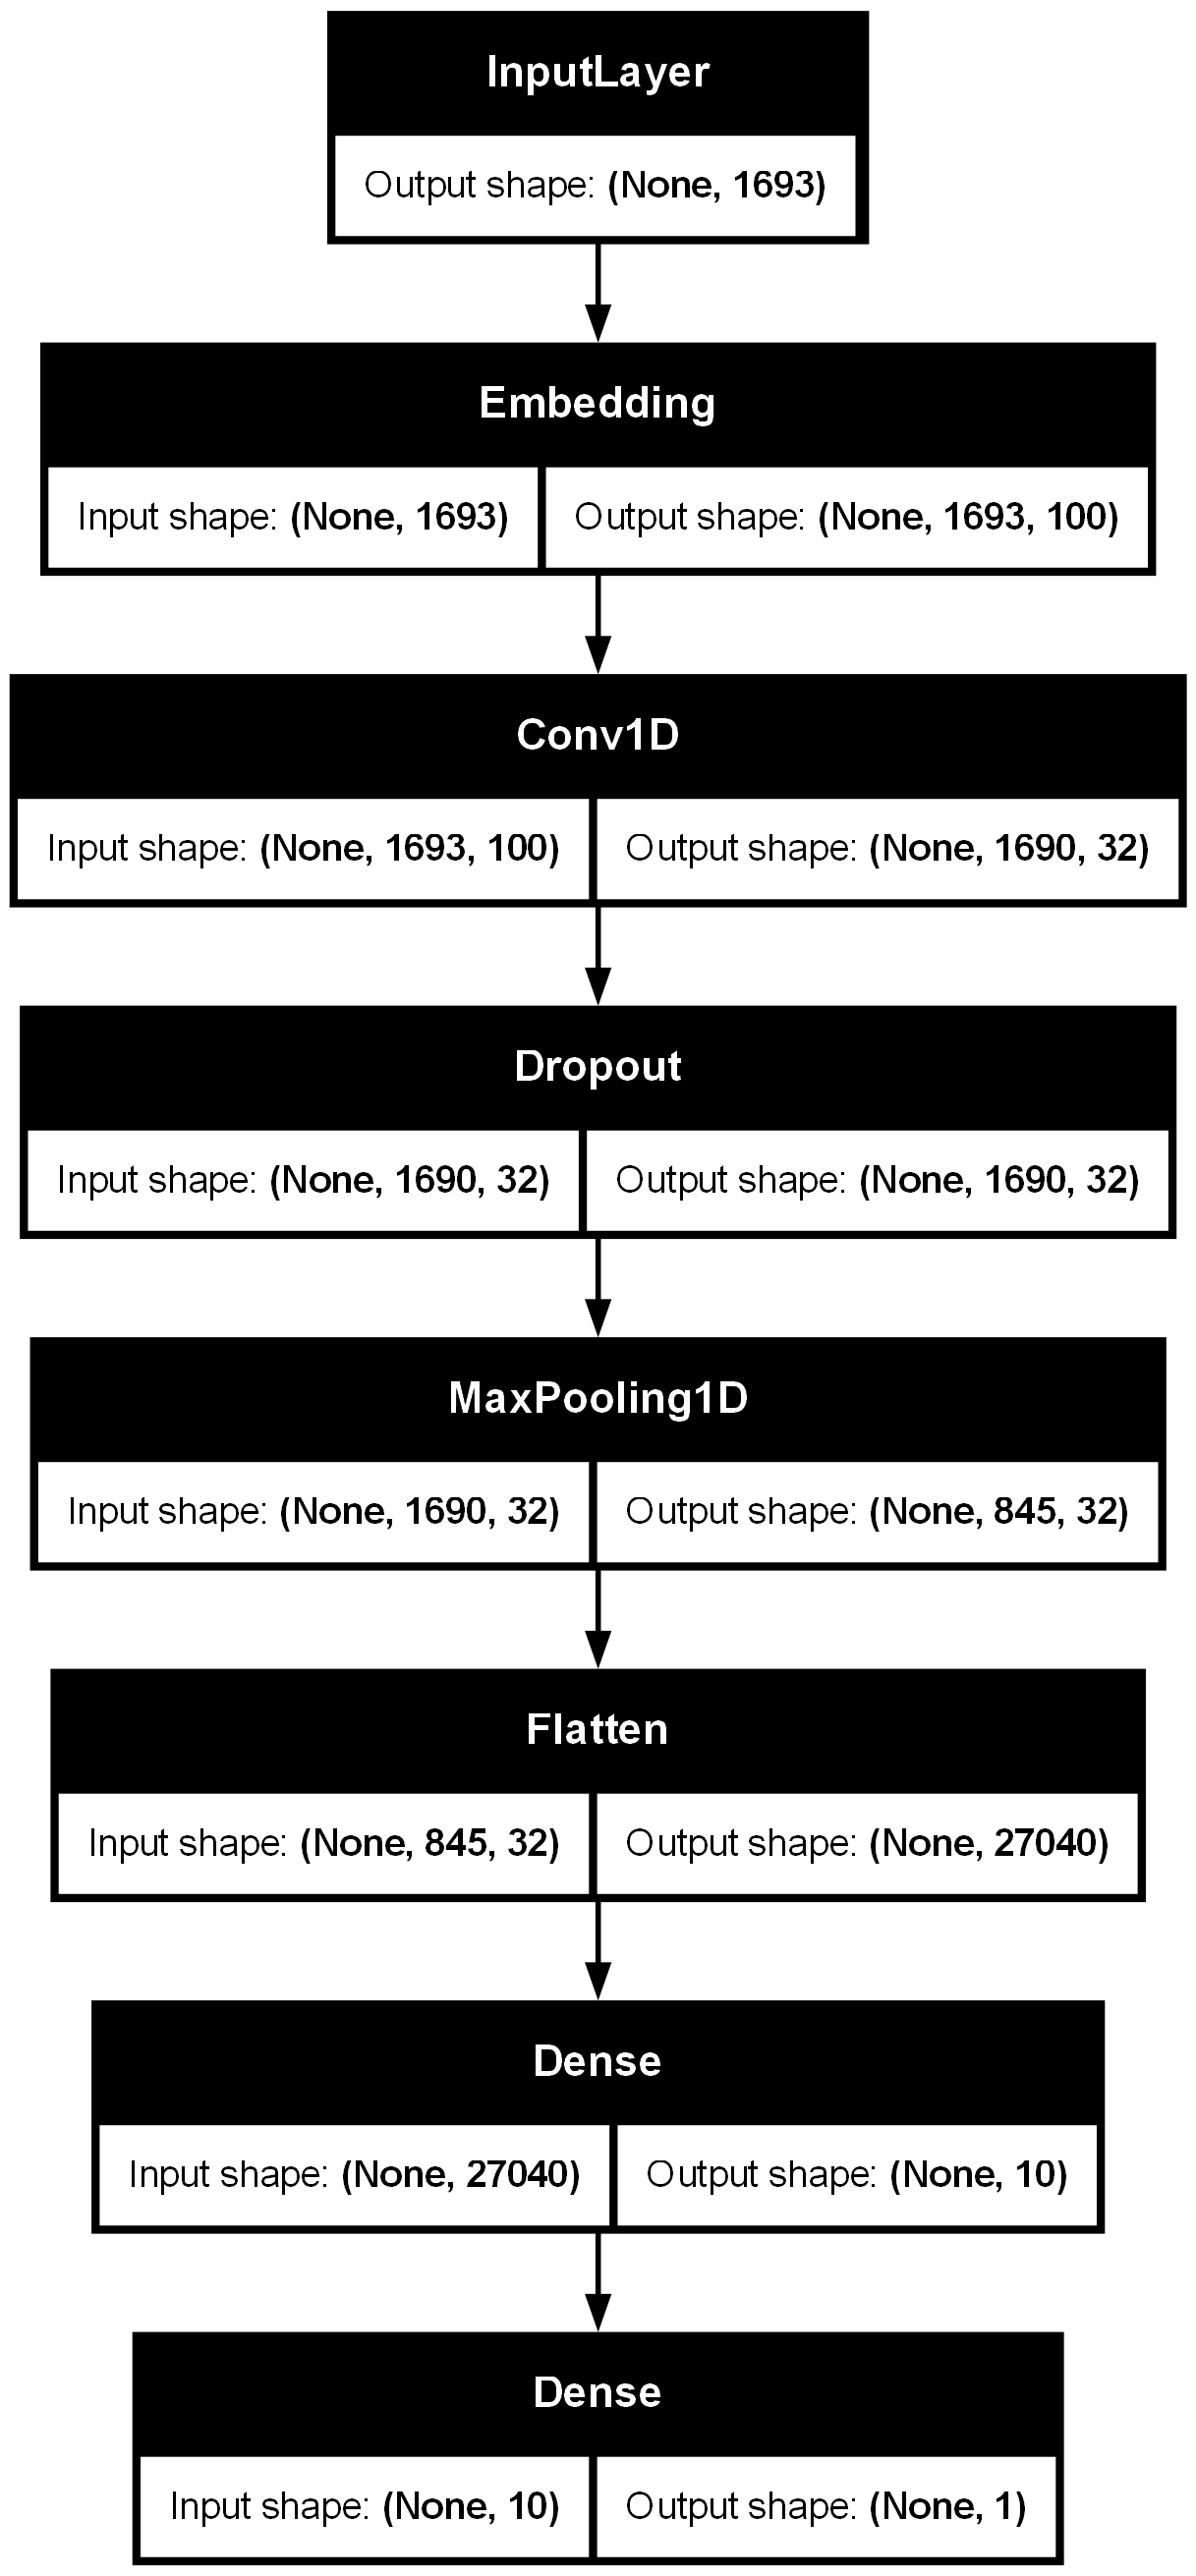

In [30]:
plot_model(model, show_shapes=True)

In [62]:
from tensorflow.keras.models import load_model

In [63]:
model = load_model('textcnn.keras')

In [64]:
with open('tokenizer.keras', 'rb') as f:
    tokenizer = pickle.load(f)

In [65]:
tokenizer.word_index

{'film': 1,
 'nt': 2,
 'movie': 3,
 'one': 4,
 'like': 5,
 'even': 6,
 'time': 7,
 'good': 8,
 'would': 9,
 'story': 10,
 'much': 11,
 'get': 12,
 'character': 13,
 'also': 14,
 'two': 15,
 'characters': 16,
 'see': 17,
 'first': 18,
 'well': 19,
 'way': 20,
 'could': 21,
 'make': 22,
 'really': 23,
 'films': 24,
 'little': 25,
 'people': 26,
 'plot': 27,
 'life': 28,
 'scene': 29,
 'never': 30,
 'bad': 31,
 'best': 32,
 'man': 33,
 'new': 34,
 'scenes': 35,
 'know': 36,
 'many': 37,
 'movies': 38,
 'great': 39,
 'another': 40,
 'director': 41,
 'love': 42,
 'go': 43,
 'something': 44,
 'us': 45,
 'still': 46,
 'back': 47,
 'end': 48,
 'action': 49,
 'made': 50,
 'world': 51,
 'seems': 52,
 'work': 53,
 'makes': 54,
 'big': 55,
 'however': 56,
 'every': 57,
 'though': 58,
 'take': 59,
 'better': 60,
 'seen': 61,
 'audience': 62,
 'around': 63,
 'enough': 64,
 'performance': 65,
 'going': 66,
 'things': 67,
 'gets': 68,
 'may': 69,
 'real': 70,
 'look': 71,
 'think': 72,
 'role': 73,
 '

In [66]:
model.predict()

TypeError: TensorFlowTrainer.predict() missing 1 required positional argument: 'x'